# Cluster Visualisations for FairCal based on Salvador et al., 2022

### Imports

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# If needed
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### Loading a cluster file

In [17]:
def load_clusters(dataset, feature, n_clusters, fold_nr, clustering_method):
    folder_name = None
    if clustering_method == 'kmeans':
        folder_name = 'clustering_faircal'
    elif clustering_method == 'kmeans-fsn':
        folder_name = 'clustering_fsn'
    elif clustering_method == 'gmm-discrete':
        folder_name = 'clustering_faircal-gmm'
    else:
        print('Please provide a valid clustering method.')  
    filename = f'experiments/{folder_name}/{dataset}_{feature}_nclusters{str(n_clusters)}_fold{str(fold_nr)}'
    results = np.load(f'{filename}.npy', allow_pickle=True).item()
    
    if 'pycave' in str(type(results)):
        if results.trainer_params['accelerator'] == 'gpu':
            results.trainer_params['accelerator'] = None
            results.trainer_params_user['accelerator'] = None
    
    return results

### Example dataset-feature-cluster-fold-clustering technique combination with K-means

In [18]:
dataset = 'rfw'
feature = 'facenet-webface'
n_clusters = 100
fold_nr = 1
clustering_method = 'kmeans'

img_array = load_clusters(dataset, feature, n_clusters, fold_nr, clustering_method)

### Loading the embeddings

In [4]:
def load_embeddings(dataset, feature):
    embedding_data = pickle.load(open(f'embeddings/{feature}_{dataset}_embeddings.pk', 'rb'))
    
    return embedding_data

In [5]:
embedding_data = load_embeddings(dataset, feature)

### Predicting clusters

In [6]:
embedding_data['i_cluster'] = img_array.predict(np.vstack(embedding_data['embedding'].to_numpy()))

Predicting: 0it [00:00, ?it/s]

### Storing information on what image paths belong to a each cluster

In [7]:
cluster_scores = {}

for cluster_id in range(n_clusters):
    cond = embedding_data['i_cluster'] == cluster_id
    cluster_scores[str(cluster_id + 1)] = embedding_data['img_path'][cond].tolist()

### Visualising a sample cluster obtained by K-means

In [8]:
def visualise_clusters(cluster_scores, start, stop, dataset, fold_nr, feature, clustering_method):
    x_size = 10
    y_size = 10

    number_plotted_already = 0

    for cluster_to_visualise in range(start, stop):
        f, axarr = plt.subplots(x_size, y_size)
        number_plotted_already = 0
        for x_axis in range(x_size):
            for y_axis in range(y_size):
                img_path = cluster_scores[str(cluster_to_visualise)][number_plotted_already]
                image = mpimg.imread(img_path)
                axarr[x_axis, y_axis].margins(x=0)
                axarr[x_axis, y_axis].imshow(image)
                axarr[x_axis, y_axis].margins(x=0)
                axarr[x_axis, y_axis].axis('off')
                number_plotted_already += 1
        
        f.suptitle(f"Cluster {cluster_to_visualise} \n{dataset}, fold {fold_nr}, fitted on {feature}")
        f.savefig(f"Cluster{cluster_to_visualise}_{dataset}_{feature}_{fold_nr}_{clustering_method}.pdf", bbox_inches = 'tight')
        plt.show()
  

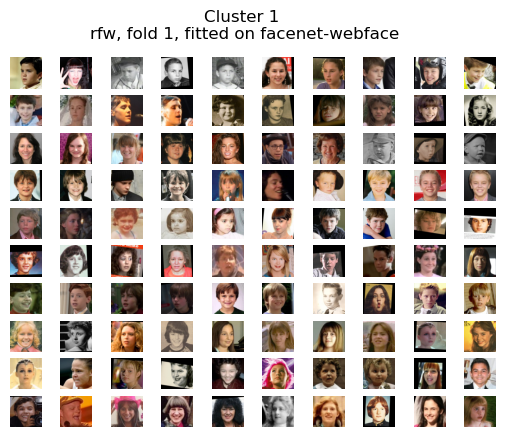

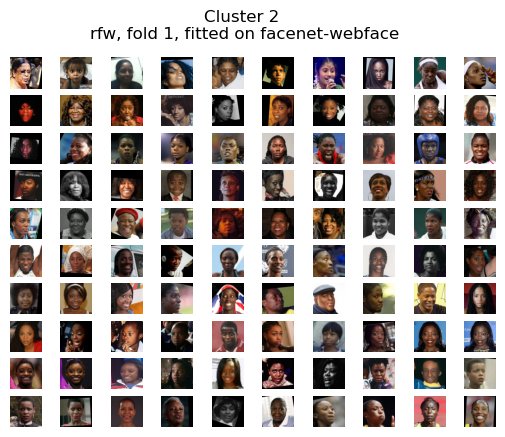

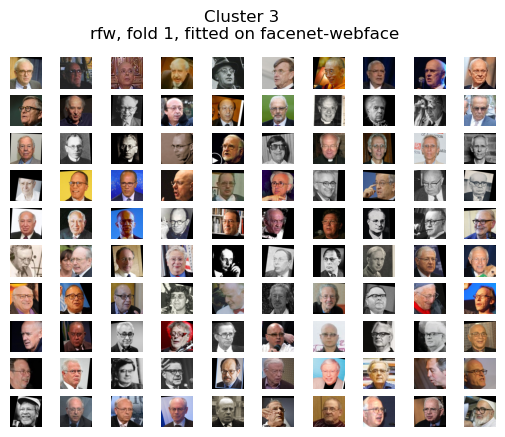

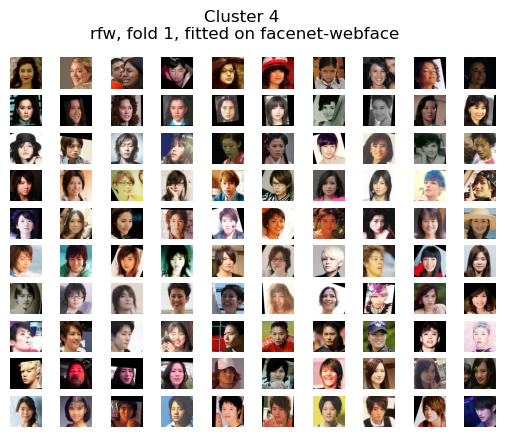

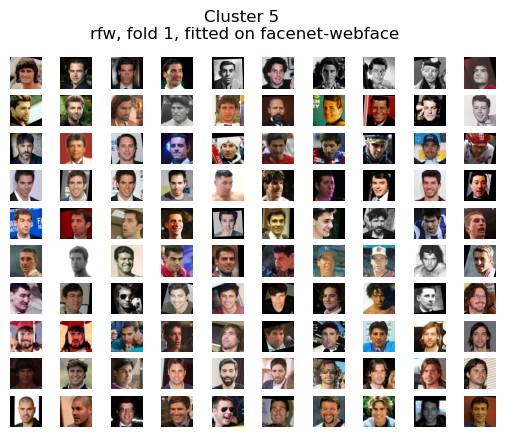

In [9]:
visualise_clusters(cluster_scores, 1, 6, dataset, fold_nr, feature, clustering_method)

### Example dataset-feature-cluster-fold-clustering technique combination with GMMs

In [10]:
dataset = 'rfw'
feature = 'facenet'
n_clusters = 100
fold_nr = 5
clustering_method = 'gmm-discrete'

img_array = load_clusters(dataset, feature, n_clusters, fold_nr, clustering_method)

In [11]:
embedding_data = load_embeddings(dataset, feature)

In [12]:
embedding_data['i_cluster'] = img_array.predict(np.vstack(embedding_data['embedding'].to_numpy()))

Predicting: 0it [00:00, ?it/s]

In [13]:
cluster_scores = {}

for cluster_id in range(n_clusters):
    cond = embedding_data['i_cluster'] == cluster_id
    cluster_scores[str(cluster_id + 1)] = embedding_data['img_path'][cond].tolist()

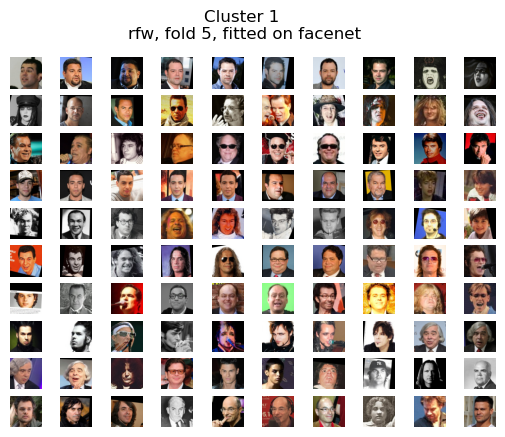

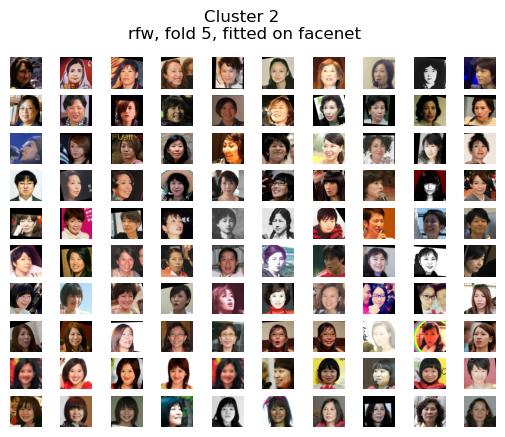

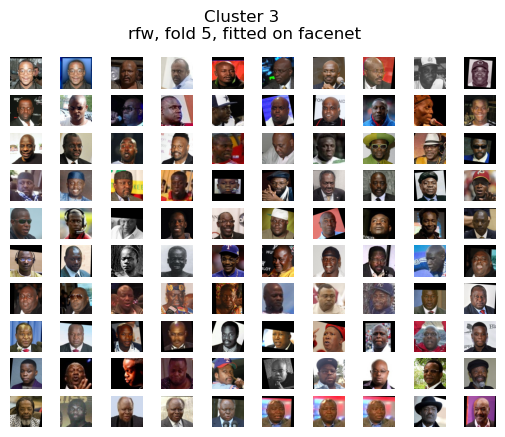

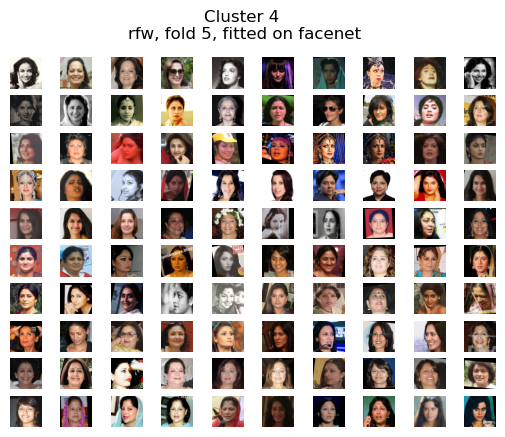

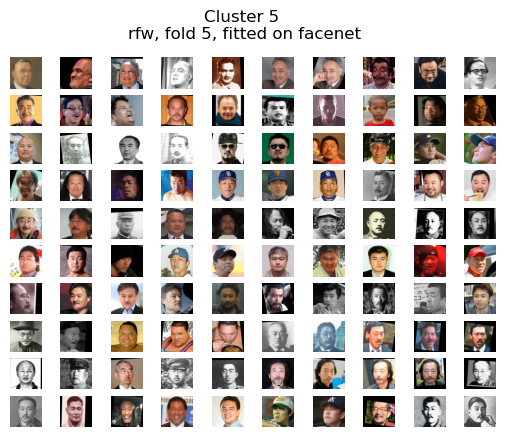

In [14]:
visualise_clusters(cluster_scores, 1, 6, dataset, fold_nr, feature, clustering_method)